# FIND THE PRBLM---> COLLECTING DATASET---> LOAD SUMARIZE ---> LABEL ENCODING ---> ALGORITHM ---> DATA VISUVALIZTION---> FITTING MODEL -->VISUVALIZATION CLUSTER

# basically pandas defaulty show only 20 column above 20 it truncate the value so we use this pd.set_option function is give full columns None is dont truncate value

In [1]:
import pandas as pd
data=pd.read_csv("sales_data_clustering.csv",encoding='latin-1')
pd.set_option('display.max_columns',None)
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# Preprocesing

In [2]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [3]:
data.shape

(2823, 25)

In [4]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


# select datatypes also use show the truncated columns 

In [6]:
object=data.select_dtypes(include=['object']).columns
print(object)

Index(['ORDERDATE', 'STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME',
       'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [7]:
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

# Feature Engineering

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
len(data['ADDRESSLINE2'].unique())

10

In [10]:
len(data['STATE'].unique())

17

In [11]:
len(data['TERRITORY'].unique())

4

In [12]:
len(data['POSTALCODE'].unique())

74

In [13]:
len(data['ORDERNUMBER'].unique())

307

In [14]:
len(data['QUANTITYORDERED'].unique())

58

In [15]:
data.drop(['ADDRESSLINE2','STATE','TERRITORY','POSTALCODE','ORDERNUMBER','QUANTITYORDERED'],axis=1,inplace=True)

In [16]:
data.head()

,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small
1,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,Henriot,Paul,Small
2,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,Da Cunha,Daniel,Medium
3,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium
4,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['ORDERDATE']=le.fit_transform(data['ORDERDATE'])
data['STATUS']=le.fit_transform(data['STATUS'])
data['PRODUCTLINE']=le.fit_transform(data['PRODUCTLINE'])
data['PRODUCTCODE']=le.fit_transform(data['PRODUCTCODE'])
data['CUSTOMERNAME']=le.fit_transform(data['CUSTOMERNAME'])
data['PHONE']=le.fit_transform(data['PHONE'])
data['ADDRESSLINE1']=le.fit_transform(data['ADDRESSLINE1'])
data['CITY']=le.fit_transform(data['CITY'])
data['COUNTRY']=le.fit_transform(data['COUNTRY'])
data['CONTACTFIRSTNAME']=le.fit_transform(data['CONTACTFIRSTNAME'])
data['CONTACTLASTNAME']=le.fit_transform(data['CONTACTLASTNAME'])
data['DEALSIZE']=le.fit_transform(data['DEALSIZE'])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PRICEEACH         2823 non-null   float64
 1   ORDERLINENUMBER   2823 non-null   int64  
 2   SALES             2823 non-null   float64
 3   ORDERDATE         2823 non-null   int64  
 4   STATUS            2823 non-null   int64  
 5   QTR_ID            2823 non-null   int64  
 6   MONTH_ID          2823 non-null   int64  
 7   YEAR_ID           2823 non-null   int64  
 8   PRODUCTLINE       2823 non-null   int64  
 9   MSRP              2823 non-null   int64  
 10  PRODUCTCODE       2823 non-null   int64  
 11  CUSTOMERNAME      2823 non-null   int64  
 12  PHONE             2823 non-null   int64  
 13  ADDRESSLINE1      2823 non-null   int64  
 14  CITY              2823 non-null   int64  
 15  COUNTRY           2823 non-null   int64  
 16  CONTACTLASTNAME   2823 non-null   int64  


In [18]:
len(data['PRICEEACH'].unique())


1016

In [19]:
len(data['SALES'].unique())

2763

In [20]:
from sklearn.cluster import KMeans
x=data[['PRICEEACH','SALES']]

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(data)

In [22]:
x=pd.DataFrame(data)
x.head()

,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,95.70,2,2871.00,112,5,1,2,2003,1,95,0,45,48,57,42,18,76,36,2
1,81.35,5,2765.90,185,5,2,5,2003,1,95,0,66,54,40,56,6,28,54,2
2,94.74,2,3884.34,204,5,3,7,2003,1,95,0,46,16,21,52,6,17,11,1
3,83.26,6,3746.70,226,5,3,8,2003,1,95,0,85,76,54,53,18,75,31,1
4,100.00,14,5205.27,23,5,4,10,2003,1,95,0,23,77,51,59,18,8,31,1


# K-Means Clustering

# IT USE INERTIA VALUE 
# CENTROIDS ARE THE CENTER POINTS OF CLUSTER EACH DATA POINTS CALCULATE DISTANCE USUALLY EUCLIIDEAN TO ALL CENTROIDS

In [23]:
from sklearn.cluster import KMeans
km=KMeans(random_state=1)
km.fit(data)

KMeans(random_state=1)

In [24]:
km.cluster_centers_

array([[ 9.54765000e+01,  6.33913043e+00,  4.03145341e+03,
         1.12891304e+02,  4.81521739e+00,  2.73478261e+00,
         7.18695652e+00,  2.00380652e+03,  2.18260870e+00,
         1.14895652e+02,  5.04608696e+01,  4.79369565e+01,
         4.41065217e+01,  4.83369565e+01,  3.74043478e+01,
         1.20978261e+01,  3.88630435e+01,  3.65434783e+01,
         1.00000000e+00],
       [ 8.80856410e+01,  6.57264957e+00,  3.14911872e+03,
         1.16152137e+02,  4.74529915e+00,  2.71794872e+00,
         7.06324786e+00,  2.00377436e+03,  2.61538462e+00,
         9.82495726e+01,  5.81777778e+01,  4.67521368e+01,
         4.32444444e+01,  5.00376068e+01,  3.76188034e+01,
         1.20871795e+01,  4.08239316e+01,  3.57076923e+01,
         1.32649573e+00],
       [ 1.00000000e+02,  5.23333333e+00,  1.04456263e+04,
         1.38766667e+02,  4.56666667e+00,  2.50000000e+00,
         6.26666667e+00,  2.00423333e+03,  1.66666667e+00,
         1.57900000e+02,  2.91000000e+01,  4.61000000e+01,
    

In [25]:
km.inertia_

335236437.27913237

In [26]:
labels=km.labels_
labels

array([1, 1, 0, ..., 5, 6, 1], shape=(2823,), dtype=int32)

In [27]:
from sklearn.metrics import silhouette_score
sc=silhouette_score(data,km.labels_)
print(sc)

0.4777035777027986


In [28]:
import matplotlib.pyplot as plt

# Data cleaning 
# data transformation 
# performance optimation


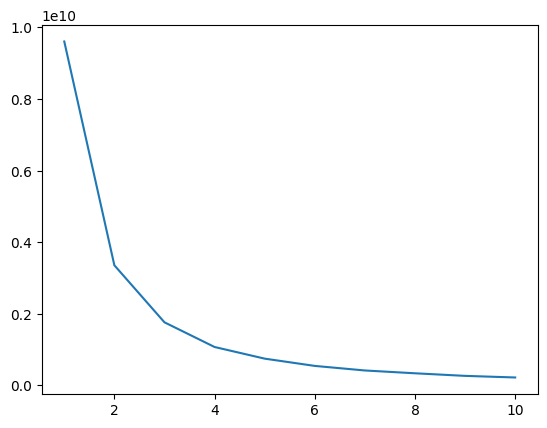

In [29]:
from sklearn.cluster import KMeans
sc=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=1)
    km.fit(data)
    sc.append(km.inertia_)
plt.plot(range(1,11),sc)
plt.show()

In [30]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=2)
km.fit(data)
labels=km.labels_
labels
from sklearn.metrics import silhouette_score
sc=silhouette_score(data,km.labels_)
print(sc)

0.5443877625133169


# Cluster is overlap and WCSS is below 10 

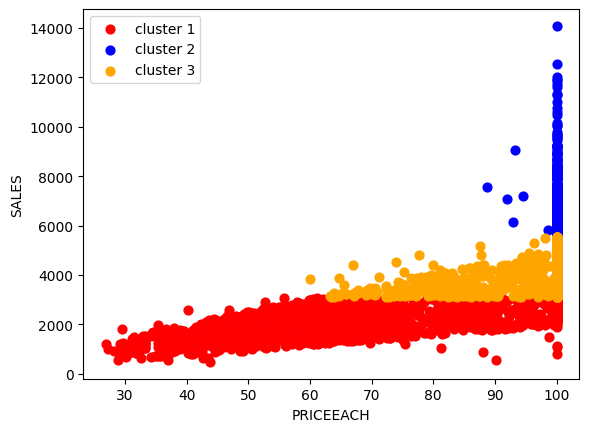

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
x=data[['PRICEEACH','SALES']]
plt.scatter(x[km.labels_==0]['PRICEEACH'],x[km.labels_==0]['SALES'],s=40,c='red',label='cluster 1')
plt.scatter(x[km.labels_==1]['PRICEEACH'],x[km.labels_==1]['SALES'],s=40,c='blue',label='cluster 2')
plt.scatter(x[km.labels_==2]['PRICEEACH'],x[km.labels_==2]['SALES'],s=40,c='orange',label='cluster 3')
plt.xlabel('PRICEEACH')
plt.ylabel('SALES')
plt.legend()
plt.show()

# Hirachical Clustering

# THERE TWO TYPES OF MODEL
# AGGLOMERATIVE CLUSTER
# DIVISIVE CLUSTER

In [32]:
from sklearn.cluster import AgglomerativeClustering
md=AgglomerativeClustering()
md.fit(data)

AgglomerativeClustering()

In [33]:
md.linkage

'ward'

# IT USE DISTANCE MATRIX METHOD SO WE USE DENDOGRAM THE DISTANCE IS EUCLIDEAN DISTANCE 
# IT FIND OUT CLUSTER IN LINKAGE CRITERIA THERE ARE THRE LINKAGE METHOD- SINGLE,COMPLETE,WARD


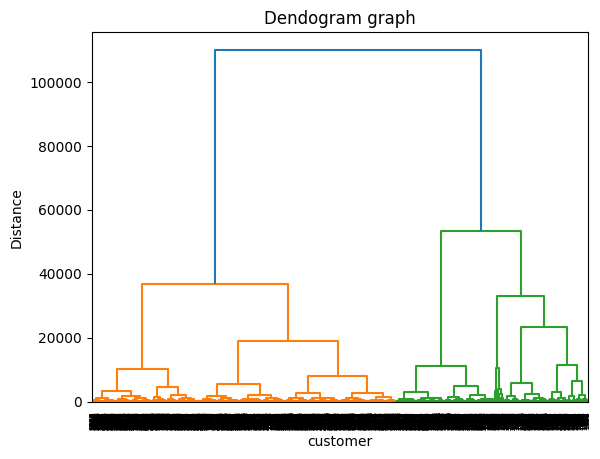

In [34]:
import scipy.cluster.hierarchy as cl 
plt.Figure(figsize=(17,9))
den=cl.dendrogram(cl.linkage(data,method='ward'))
plt.title('Dendogram graph')
plt.xlabel('customer')
plt.ylabel('Distance')
plt.show()

# WARD  LINKAGE METHOD- SEQUENTIALLY MERGING SIMILAR CLUSTER

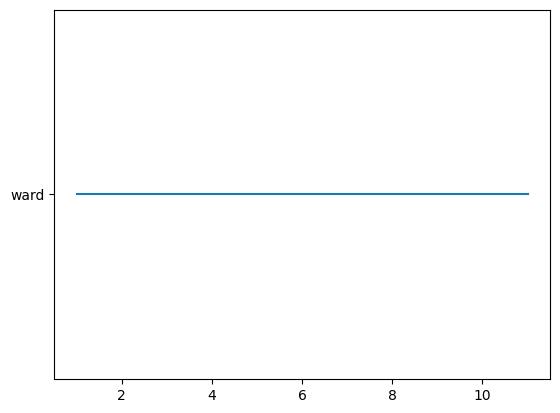

In [35]:
from sklearn.cluster import AgglomerativeClustering
sd=[]
for i in range(1,12):
    md=AgglomerativeClustering(n_clusters=i,linkage='ward')
    md.fit(data)
    sd.append(md.linkage)
plt.plot(range(1,12),sd) 
plt.show()   

In [40]:
from sklearn.cluster import AgglomerativeClustering
md=AgglomerativeClustering(n_clusters=5,linkage='ward')
y_mean=md.fit_predict(data)
y_mean

array([1, 1, 2, ..., 0, 1, 1], shape=(2823,))

In [37]:
label=md.labels_
label

array([0, 0, 2, ..., 5, 0, 0], shape=(2823,))

# Single Linkage Method

# SINGLE TWO MOST SIMILAR PARTS OF CLUSTER 

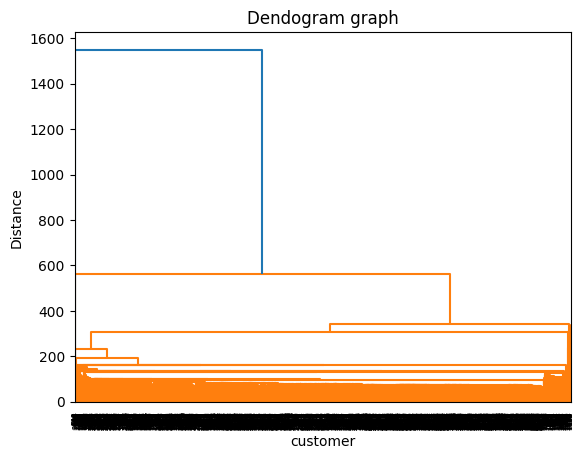

In [41]:
import scipy.cluster.hierarchy as cl 
plt.Figure(figsize=(17,9))
den=cl.dendrogram(cl.linkage(data,method='single'))
plt.title('Dendogram graph')
plt.xlabel('customer')
plt.ylabel('Distance')
plt.show()

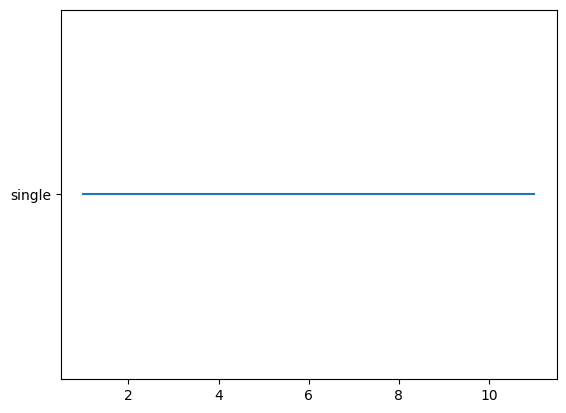

In [42]:
from sklearn.cluster import AgglomerativeClustering
sd=[]
for i in range(1,12):
    md=AgglomerativeClustering(n_clusters=i,linkage='single')
    md.fit(data)
    sd.append(md.linkage)
plt.plot(range(1,12),sd) 
plt.show()   

In [43]:
from sklearn.cluster import AgglomerativeClustering
md=AgglomerativeClustering(n_clusters=5,linkage='single')
y_mean=md.fit_predict(data)
y_mean

array([1, 1, 1, ..., 1, 1, 1], shape=(2823,))

# Complete Linkage Method

# COMPLETE - TAKE CENTER OF THE CLUSTER AND LEAST TWO SIMILAR CLUSTER

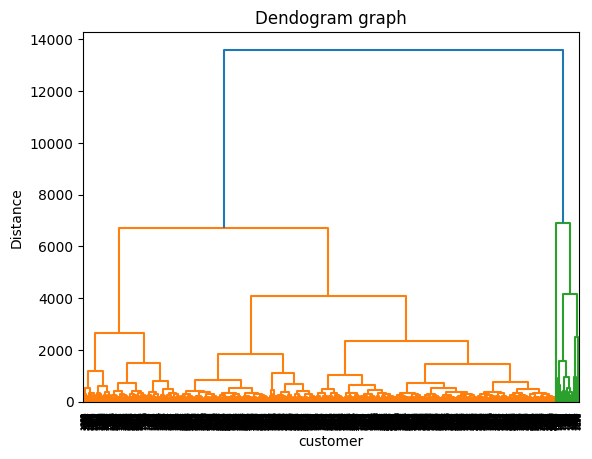

In [44]:
import scipy.cluster.hierarchy as cl 
plt.Figure(figsize=(17,9))
den=cl.dendrogram(cl.linkage(data,method='complete'))
plt.title('Dendogram graph')
plt.xlabel('customer')
plt.ylabel('Distance')
plt.show()

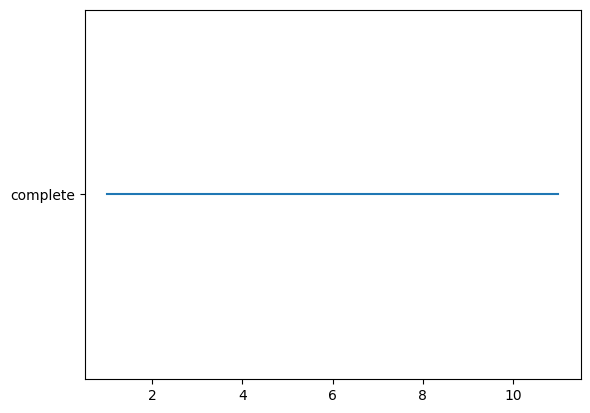

In [45]:
from sklearn.cluster import AgglomerativeClustering
sd=[]
for i in range(1,12):
    md=AgglomerativeClustering(n_clusters=i,linkage='complete')
    md.fit(data)
    sd.append(md.linkage)
plt.plot(range(1,12),sd) 
plt.show()   

In [46]:
from sklearn.cluster import AgglomerativeClustering
md=AgglomerativeClustering(n_clusters=5,linkage='complete')
y_mean=md.fit_predict(data)
y_mean

array([0, 0, 0, ..., 1, 0, 0], shape=(2823,))

In [47]:
from sklearn.metrics import silhouette_score
sc=silhouette_score(data,md.labels_)
print(sc)

0.5402796575829937


# First cluster is overlap and also other 4 cluster high price in vertical WCSS is below 10

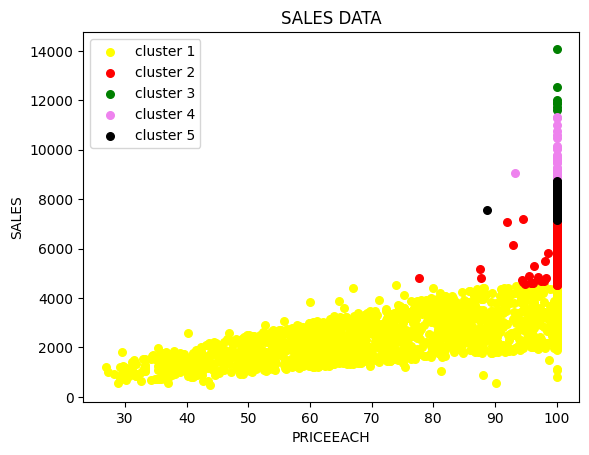

In [48]:
x=data.iloc[:,[0,2]].values
plt.scatter(x[y_mean==0,0], x[y_mean==0,1],s=30,c='yellow',label='cluster 1')
plt.scatter(x[y_mean==1,0], x[y_mean==1,1],s=30,c='red',label='cluster 2')
plt.scatter(x[y_mean==2,0], x[y_mean==2,1],s=30,c='green',label='cluster 3')
plt.scatter(x[y_mean==3,0], x[y_mean==3,1],s=30,c='violet',label='cluster 4')
plt.scatter(x[y_mean==4,0], x[y_mean==4,1],s=30,c='black',label='cluster 5')
plt.legend()
plt.title('SALES DATA')
plt.xlabel('PRICEEACH')
plt.ylabel('SALES')
plt.show()

# DBSCAN- DENSITY BASED SPATIAL CLUSTERING OF APPLICATION WITH NOISE
# NO NEED TO PRE SPECIFY THE NUMBER OF CLUSTER 
# HANDLE NOISE (OUTLIERS)
# USING ANOMALY DECTION,FRAUD DETECTION

In [62]:
from sklearn.cluster import DBSCAN
mo=DBSCAN(eps=0.5,min_samples=3)
mo.fit(data)

DBSCAN(min_samples=3)

In [63]:
from sklearn.metrics import silhouette_score
s=silhouette_score(data,md.labels_,sample_size=23)
print(s)

0.37848676796896386


# High price with low sales in first cluster

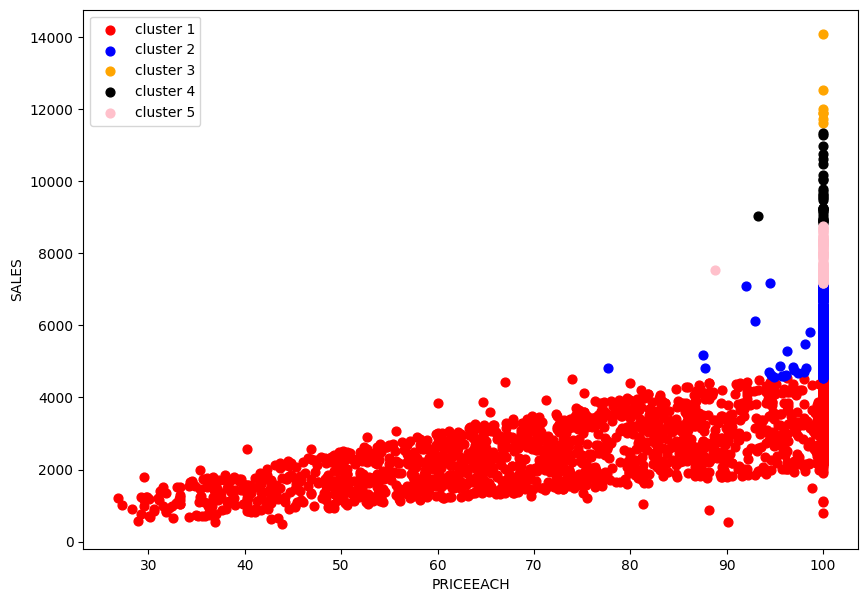

In [64]:
plt.figure(figsize=(10,7))
x=data[['PRICEEACH','SALES']]
plt.scatter(x[md.labels_==0]['PRICEEACH'],x[md.labels_==0]['SALES'],s=40,c='red',label='cluster 1')
plt.scatter(x[md.labels_==1]['PRICEEACH'],x[md.labels_==1]['SALES'],s=40,c='blue',label='cluster 2')
plt.scatter(x[md.labels_==2]['PRICEEACH'],x[md.labels_==2]['SALES'],s=40,c='orange',label='cluster 3')
plt.scatter(x[md.labels_==3]['PRICEEACH'],x[md.labels_==3]['SALES'],s=40,c='black',label='cluster 4')
plt.scatter(x[md.labels_==4]['PRICEEACH'],x[md.labels_==4]['SALES'],s=40,c='pink',label='cluster 5')
plt.xlabel('PRICEEACH')
plt.ylabel('SALES')
plt.legend()
plt.show()